## Logistic Regression Analysis for Termite Discovery

This notebook explores the use of Logistic Regression to predict termite discovery based on variety of factors across the world. Our focus is to demonstrate how Logistic Regression can be applied to an ecological dataset for meaningful insights.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\isabe\INDE 577\INDE-577\global_termite_microbe_wd.csv')

df.dropna(inplace=True)

## Data Preprocessing

In this section, we preprocess the data by selecting relevant features, handling missing values, encoding categorical variables, and normalizing numerical features. This step is crucial to prepare the dataset for effective model training.


In [10]:
# Selecting a broader range of features
features = ['wood_used', 'treatment', 'initial_wt', 'final_wt', 'N_pc', 'C_pc', 'P_pc', 'Mg_pc', 'Ca_pc', 'K_pc', 'Al_pc', 'Mn_pc', 'termite_discovery']
country_data = df[features].dropna()

# Encoding categorical data
label_encoder = LabelEncoder()
country_data['wood_used'] = label_encoder.fit_transform(country_data['wood_used'])
country_data['treatment'] = label_encoder.fit_transform(country_data['treatment'])

# Normalizing numerical features
scaler = StandardScaler()
numerical_features = ['initial_wt', 'final_wt', 'N_pc', 'C_pc', 'P_pc', 'Mg_pc', 'Ca_pc', 'K_pc', 'Al_pc', 'Mn_pc']
country_data[numerical_features] = scaler.fit_transform(country_data[numerical_features])

# Splitting the data into features and labels
X = country_data.drop('termite_discovery', axis=1)
y = country_data['termite_discovery'].astype('int')  # Ensure it's integer type for logistic regression

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Logistic Regression Model Initialization and Training

Following the preprocessing of our data, which includes encoding categorical variables and normalizing the features, we move forward with setting up our logistic regression model, using the sklearn package. After training, we evaluate the model's performance based on accuracy and a confusion matrix to understand its effectiveness in predicting termite discovery.

### What is Logistic Regression?

Logistic Regression is a statistical model used in machine learning for binary classification tasks. It estimates the probabilities using a logistic function, which is a cumulative logistic distribution. The central premise of the model is the assumption about the log-odds of the dependent variable:

$$ \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n $$

Here, \( p \) is the probability of one of the classes being `true` (e.g., termite discovery), \( X \) are the features, \( \beta \) are the coefficients, and \( \beta_0 \) is the intercept.

### Training Logistic Regression

We train the logistic regression model by fitting it to the data using the `fit` method, which involves maximizing the likelihood of the data under the logistic model. This process adjusts the weights \( \beta \) to best predict the class label \( y \).

Here is the code snippet to initialize and train our logistic regression model:

In [11]:
# Splitting the data into features and labels
X = country_data.drop('termite_discovery', axis=1)
y = country_data['termite_discovery']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)


Accuracy: 0.8884615384615384
Confusion Matrix:
 [[1318   47]
 [ 127   68]]


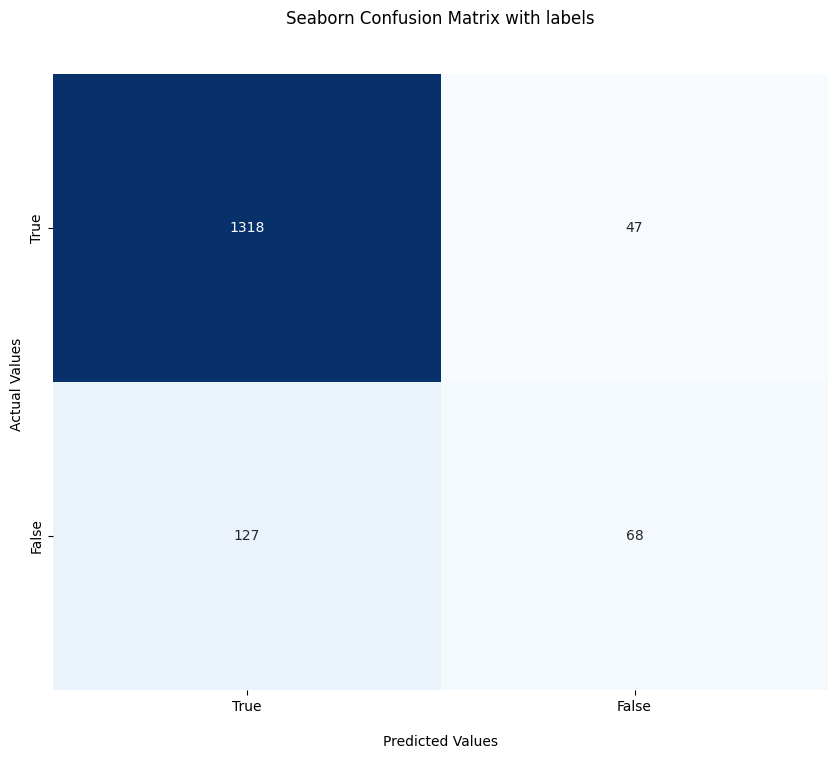

In [12]:
# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True', 'False'])
ax.yaxis.set_ticklabels(['True','False'])
plt.show()

## Conclusion 

This logistic regression analysis demonstrated a high overall accuracy of 88.85%, indicating a strong ability to classify the majority of cases correctly. However, the detailed examination of the confusion matrix reveals some areas for improvement, particularly in correctly identifying actual termite discoveries.

### Performance Breakdown

- The model showed excellent capability in identifying situations where termites were not present, with a high number of true negatives (1318).
- Conversely, it was less effective in detecting true termite discoveries, as indicated by the 127 false negatives and only 68 true positives.

### Implications

The imbalance in performance suggests that while the model is reliable for predicting the absence of termites, it could benefit from enhancements to better detect their presence. This is crucial for practical applications where failing to detect termites could lead to significant economic or ecological damage.


